Saving student_data.csv to student_data (10).csv
Logging test passed. Starting pipeline.
Missing data handled.
Categorical variables encoded.
Outliers removed from absences.
Data normalized.
Features engineered.
Dimensionality reduced. Explained variance: [0.21116789 0.16948762 0.09781365 0.07488095 0.06979115]


/tmp/ipython-input-673986756.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-673986756.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

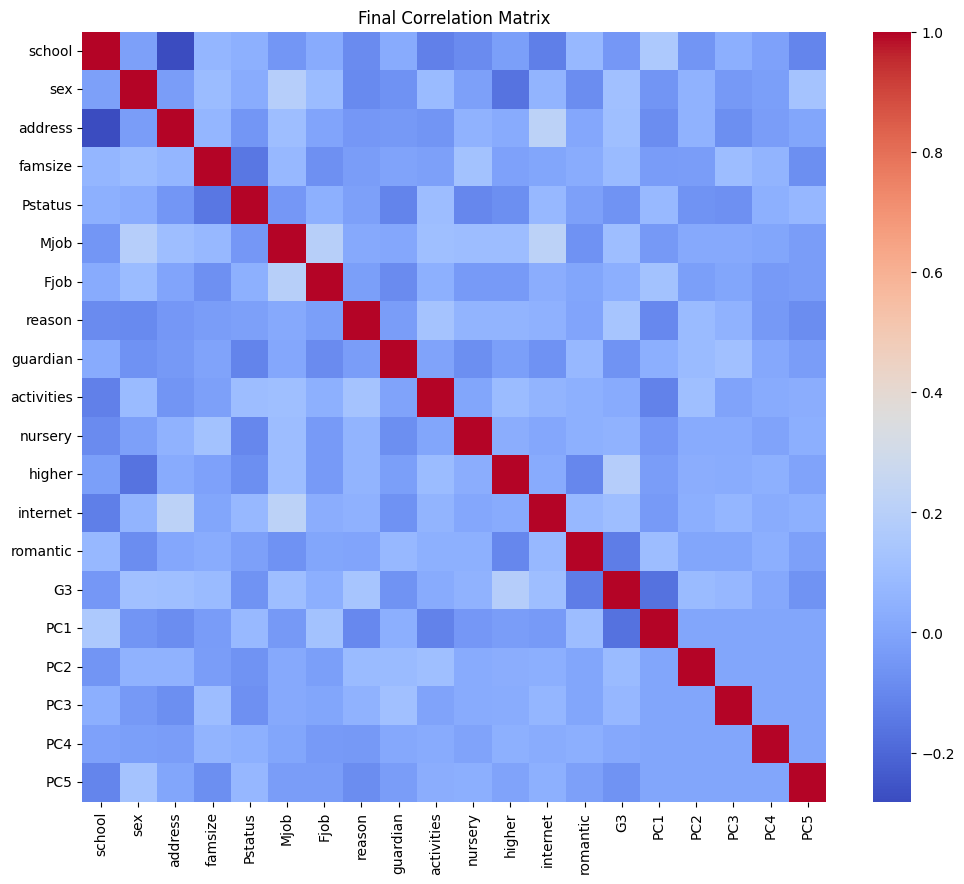

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Checking if pipeline_log.txt exists...
File content before download: Pipeline started at 2025-09-22 16:10:26.019445
2025-09-22 16:10:26.019747 - INFO - Logging setup successful. Pipeline started.
2025-09-22 16:10:26.022898 - INFO - Starting missing data handling.
2025-09-22 16:10:26.032111 - INFO - Missing data handled successfully.
2025-09-22 16:10:26.032308 - INFO - Starting categorical variable encoding.
2025-09-22 16:10:26.037777 - INFO - Categorical variables encoded successfully.
2025-09-22 16:10:26.037985 - INFO - Starting outlier removal.
2025-09-22 16:10:26.039926 - INFO - Outliers removed from absences successfully.
2025-09-22 16:10:26.040073 - INFO - Starting normalization/scaling.
2025-09-22 16:10:26.045796 - INFO - Data normalized successfully.
2025-09-22 16:10:26.046000 - INFO - Starting feature engineering.
2025-09-22 16:10:26.047568 - INFO - Features engineered successfully.
2025-09-22 16:10:26.047708 - INFO - Starting dimensionality reduction.
2025-09-22 16:10:26.05306

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Log file downloaded successfully.


In [15]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import os

# Initialize log file with timestamp
log_file = 'pipeline_log.txt'
with open(log_file, 'w') as f:
    f.write(f"Pipeline started at {pd.Timestamp.now()}\n")

# Function to append to log
def log_message(message):
    with open(log_file, 'a') as f:
        f.write(f"{pd.Timestamp.now()} - INFO - {message}\n")

log_message("Logging setup successful. Pipeline started.")
print("Logging test passed. Starting pipeline.")

# Load and process the data
df = pd.read_csv('student_data.csv')

# 1. Handling Missing Data
log_message("Starting missing data handling.")
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
log_message("Missing data handled successfully.")
print("Missing data handled.")

# 2. Encoding Categorical Variables
log_message("Starting categorical variable encoding.")
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
log_message("Categorical variables encoded successfully.")
print("Categorical variables encoded.")

# 3. Outlier Removal
log_message("Starting outlier removal.")
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['absences'] >= Q1 - 1.5 * IQR) & (df['absences'] <= Q3 + 1.5 * IQR)]
log_message("Outliers removed from absences successfully.")
print("Outliers removed from absences.")

# 4. Normalization/Scaling
log_message("Starting normalization/scaling.")
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
log_message("Data normalized successfully.")
print("Data normalized.")

# 5. Feature Engineering
log_message("Starting feature engineering.")
df['family_edu'] = df['Medu'] + df['Fedu']
df['total_alcohol'] = df['Dalc'] + df['Walc']
df = df.drop(['schoolsup', 'famsup', 'paid'], axis=1, errors='ignore')
log_message("Features engineered successfully.")
print("Features engineered.")

# 6. Dimensionality Reduction
log_message("Starting dimensionality reduction.")
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'family_edu', 'total_alcohol']
X = df[numerical_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df = pd.concat([df.drop(numerical_cols, axis=1), pca_df], axis=1)
log_message(f"Dimensionality reduced successfully. Explained variance: {pca.explained_variance_ratio_}")
print("Dimensionality reduced. Explained variance:", pca.explained_variance_ratio_)

# Final EDA Visualization: Correlation heatmap
log_message("Generating final correlation heatmap.")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Final Correlation Matrix')
plt.savefig('final_corr.png')
files.download('final_corr.png')
log_message("Correlation heatmap saved and downloaded.")
plt.show()

# Save cleaned data
log_message("Saving cleaned data to CSV.")
df.to_csv('cleaned_student_data.csv', index=False)
files.download('cleaned_student_data.csv')
log_message("Cleaned data saved and downloaded.")

# Download the log file with debugging
log_message("Downloading pipeline log.")
print(f"Checking if {log_file} exists...")
if os.path.exists(log_file):
    print(f"File content before download: {open(log_file).read()}")
    try:
        files.download(log_file)
        log_message("Pipeline log downloaded.")
        print("Log file downloaded successfully.")
    except Exception as e:
        print(f"Download failed: {e}")
        with open(log_file, 'a') as f:
            f.write(f"Download failed: {e}\n")
else:
    print(f"Log file {log_file} not found. Creating manually...")
    with open(log_file, 'w') as f:
        f.write(f"Manual log entry - Pipeline completed at {pd.Timestamp.now()}\n")
    try:
        files.download(log_file)
        print("Manual log created and downloaded.")
    except Exception as e:
        print(f"Manual download failed: {e}")
        with open(log_file, 'a') as f:
            f.write(f"Manual download failed: {e}\n")